# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [9]:
# Your code here.
import pandas as pd
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

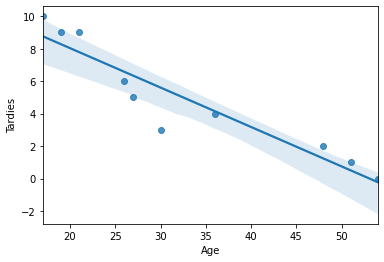

In [12]:
# Your code here.
import seaborn as sns
sns.regplot(x="Age", y="Tardies", data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
#There is a negative trend.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

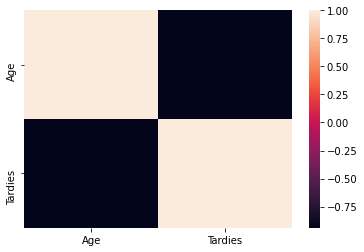

In [23]:
# Your response here.
import numpy as np

#correlation:
sns.heatmap(student_data.corr())
student_data.corr()

#covariance:
np.cov(student_data['Age'],student_data['Tardies'])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [27]:
# Your response here.

#1st way without training
import statsmodels.api as sm

X = student_data['Age']
Y = student_data['Tardies']

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()


C:\Users\so131\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           5.57e-05
Time:                        14:37:48   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = np.array(student_data['Age']).reshape(-1, 1)
Y = student_data['Tardies']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

Plot your regression model on your scatter plot.

<AxesSubplot:>

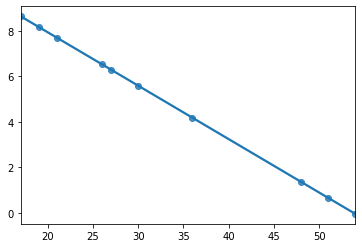

In [41]:
# Your code here.
# Predicted values and regression line of model
lm.predict(X)
sns.regplot(x=X, y=lm.predict(X))

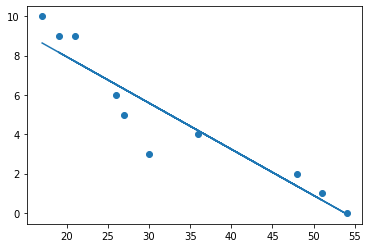

In [44]:
#Acutal values plotted as scatter and regression line of model
plt.scatter(X,Y)
plt.plot(X,lm.predict(X))

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
# Assumption that being late to class decreases with age seems to be true from your prediction model.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [46]:
# Import any libraries you may need & the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

vehicles = pd.read_csv(r'C:\Users\so131\OneDrive - Verdane\Documents\GitHub\lab-regression-analysis\your-code\vehicles.csv')
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

<AxesSubplot:>

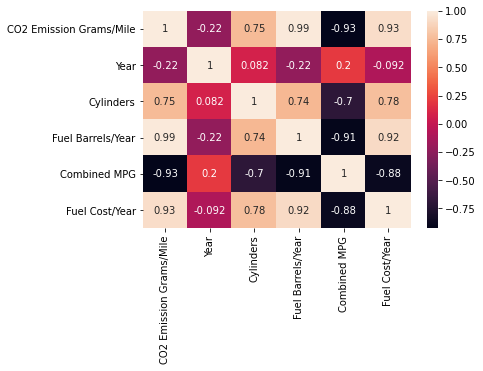

In [53]:
# Your response here. 
analysis = vehicles[['CO2 Emission Grams/Mile','Year','Cylinders','Fuel Barrels/Year','Combined MPG', 'Fuel Cost/Year']]
analysis.corr()
sns.heatmap(analysis.corr(), annot=True)

#Seems like Fuel Barrels/Year and Fuel Costs/Year as well as Cylinders impact CO2 Emissions the most. But Barrels/Year and Fuel Costs/Year might be missleading because they just tell you how much you drive not how much emissions your car has.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [57]:
# Your response here. 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = analysis[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
y = analysis['CO2 Emission Grams/Mile']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

#Multiple linear regression type used

840.9547556023734


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [59]:
# Your response here. 
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

# Most important variable is probably Cylinders, because Fuel Barrels/Year & Fuel Cost/Year just determine how much you drive, but not how much CO2 your car model is producing.

,Coeffecient
Year,-0.351123
Cylinders,2.045420
Fuel Barrels/Year,18.398950
Combined MPG,-3.281938
Fuel Cost/Year,0.035155


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [63]:
# Your code here.
import pandas as pd
parties = pd.DataFrame({'People invited': [1,3,4,6,8,9,11,14], 'People attended': [1,2,4,4,5,7,8,13]})
parties

,People invited,People attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [82]:
# Your code here.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = np.array(parties['People invited']).reshape(-1, 1)
Y = parties['People attended']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

<AxesSubplot:>

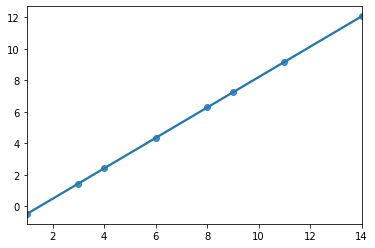

In [83]:
# Predicted values and regression line of model
lm.predict(X)
sns.regplot(x=X, y=lm.predict(X))

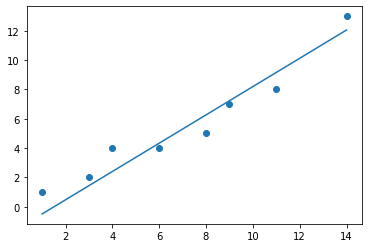

In [84]:
#Acutal values plotted as scatter and regression line of model
plt.scatter(X,Y)
plt.plot(X,lm.predict(X))

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [85]:
# Your response here. 
# Positive correlation (the more people invited, the more people attend) 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [86]:
# Your response here. 
#The last Point (14,13) seems to be an outlier, we can fit a better line without this point

#Removing the point
parties_clean = pd.DataFrame({'People invited': [1,3,4,6,8,9,11], 'People attended': [1,2,4,4,5,7,8]})

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X2 = np.array(parties_clean['People invited']).reshape(-1, 1)
Y2 = parties_clean['People attended']

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.4, random_state=101)
lm = LinearRegression()
lm.fit(X2_train,Y2_train)

LinearRegression()

<AxesSubplot:>

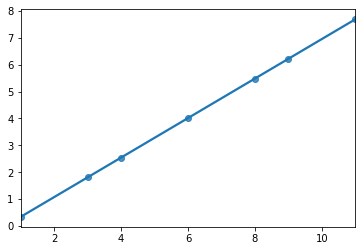

In [88]:
# Predicted values and regression line of model, without the outlier
lm.predict(X2)
sns.regplot(x=X2, y=lm.predict(X2))

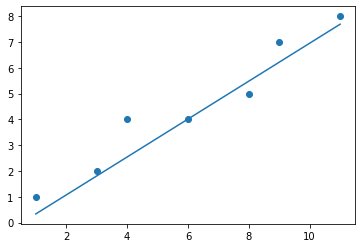

In [89]:
#Acutal values plotted as scatter and regression line of model, without the outlier
plt.scatter(X2,Y2)
plt.plot(X2,lm.predict(X2))

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [91]:
# Your response here. 
#The line became flatter. That means that there is a positive correlation and without the outlier, our model is more close to reality.
#This can be proven with the root mean square error (RMSE) of the two versions:

from sklearn import metrics
print('RMSE with outlier:', np.sqrt(metrics.mean_squared_error(X,lm.predict(X))))
print('RMSE without outlier:', np.sqrt(metrics.mean_squared_error(X2,lm.predict(X2))))

RMSE with outlier: 2.493720487246337
RMSE without outlier: 2.16844278064497
